In [1]:
#pip install pygame

In [2]:

import numpy as np
import time
import matplotlib.pyplot as plt
import cv2
import math as mt 
import scipy.special as sci
from matplotlib.animation import FuncAnimation
import tqdm as tqdm


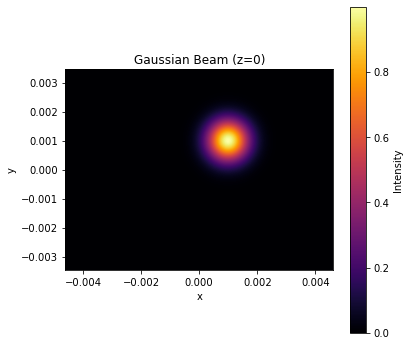

In [3]:
Nxpix = 1024 ## DIMENSIONES DEL SLM
Nypix = 768
Pix_size=9e-6 #TAMANO DEL PIXEL ES 9um

##GENERACION DE BEAMS GAUSSIANOS

def gaussian_beam(X,Y, z, w0, k,x0,y0):
    """
    Computes the Gaussian beam profile based on the given equation.
    
    Parameters:
        r  : Radial coordinate
        z  : Axial coordinate (propagation distance)
        w0 : Beam waist (radius at focus)
        k  : Wave number
    
    Returns:
        Complex field amplitude of the Gaussian beam.
    """
    R = np.sqrt((X-x0)**2 + (Y+y0)**2)
    z_R = np.pi * w0**2 / k  # Rayleigh range
    w_z = w0 * np.sqrt(1 + (z / z_R) ** 2)  # Beam waist at z
    R_z = z * (1 + (z_R / z) ** 2) if z != 0 else np.inf  # Radius of curvature
    psi_z = np.arctan(z / z_R)  # Gouy phase
    
    amplitude = (w0 / w_z) * np.exp(-R**2 / w_z**2)
    phase = np.exp(-1j * (k * z + k * R**2 / (2 * R_z) - psi_z))
    
    return amplitude * phase

# Define grid
N = (Nxpix,Nypix)  # Grid size
x = np.linspace(-Nxpix/2*Pix_size, Nxpix/2*Pix_size, Nxpix)
y = np.linspace(-Nypix/2*Pix_size, Nypix/2*Pix_size, Nypix)
X, Y = np.meshgrid(x, y)



# Set Gaussian beam parameters
w0 = 1000* 10**-6  # Beam waist
z = 0  # Propagation distance
k = 2*np.pi/633e-9  # Wave number

# Compute beam intensity
gaussian_mode = gaussian_beam(X,Y, z, w0, k,1000e-6,1000e-6)
intensity = np.abs(gaussian_mode) ** 2

# Plot the intensity pattern
plt.figure(figsize=(6, 6))
plt.imshow(intensity, extent=[-Nxpix/2*Pix_size, Nxpix/2*Pix_size, -Nypix/2*Pix_size, Nypix/2*Pix_size], cmap='inferno')
plt.colorbar(label='Intensity')
plt.title(f'Gaussian Beam (z={z})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



[-0.00035  0.00035]


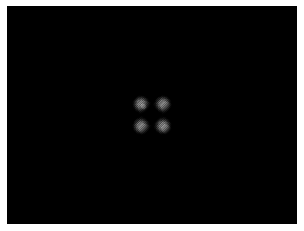

In [10]:
Nxpix = 1024 ## DIMENSIONES DEL SLM
Nypix = 768
Pix_size=9e-6 

N = (Nxpix,Nypix)  # Grid size
x = np.linspace(-Nxpix/2*Pix_size, Nxpix/2*Pix_size, Nxpix)
y = np.linspace(-Nypix/2*Pix_size, Nypix/2*Pix_size, Nypix)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)


# Set Gaussian beam parameters
w0 = 250* 10**-6  # Beam waist
z = 0  # Propagation distance
k = 2*np.pi/633e-9  # Wave number


def Gaussian_Beam_Matrix(N,size):
    
    
    xs=np.linspace(-size/2,size/2,N)
    ys=np.linspace(-size/2,size/2,N)
    
    print(xs)
    Electric_field=0
    
    for i in xs:
        for j in ys:
            
    
           Electric_field += gaussian_beam(X,Y, z, w0, k,i,j)
     
    
    return Electric_field
    
    

##GENERACION DE PATRONES AMPLITUD-FASE SEGUN (E.Bolduc,2013) "Exact solution to simultaneous intensity and phase encryption with a single phase-only hologram"


def contrast_function(C, array):
    y = C * (array - 255/2) + 255/2
    return np.clip(y, 0, 255).astype("uint8")


##GENERACION DE PATRONES AMPLITUD-FASE SEGUN (E.Bolduc,2013) "Exact solution to simultaneous intensity and phase encryption with a single phase-only hologram"

def Amplitude_Phase_pattern(Desired_Field, LAMBDA, NX, NY, Contrast=1):
    A = np.abs(Desired_Field)
    PHI = np.angle(Desired_Field)

    M = A / np.max(A)
    F = PHI - np.pi * M

    # Eliminamos los bucles for usando operaciones vectorizadas
    x = np.arange(NX)
    y = np.arange(NY)
    X, Y = np.meshgrid(x, y, indexing='xy')

    psi = M * np.mod(F + ( 2* np.pi * X / (0.7*LAMBDA)) + (2 * np.pi * Y / (0.7*LAMBDA)) , 2* np.pi)

    psi_int = ((psi - psi.min()) * (255 / (psi.max() - psi.min()))).astype(np.uint8)

    return contrast_function(Contrast, psi_int)



OutputField=Gaussian_Beam_Matrix(2,700e-6)

Hologram=Amplitude_Phase_pattern(OutputField,Pix_size,Nxpix,Nypix,Contrast=2.1) ##Variable donde guardamos la matrix de pixeles de valores del holograma

pattern=plt.imshow(Hologram,cmap="gray",aspect='equal')
#Field_int=plt.imshow(np.abs(Output_Field)**2,cmap="gray")
plt.axis('off')
plt.savefig("Figuras\HologramInput_matrix.png",bbox_inches='tight', transparent="True", pad_inches=0,dpi=300)




    

[-0.0005  0.      0.0005]


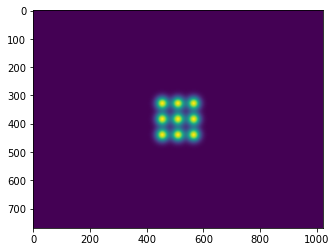

In [11]:
Nxpix = 1024 ## DIMENSIONES DEL SLM
Nypix = 768
Pix_size=9e-6 

N = (Nxpix,Nypix)  # Grid size
x = np.linspace(-Nxpix/2*Pix_size, Nxpix/2*Pix_size, Nxpix)
y = np.linspace(-Nypix/2*Pix_size, Nypix/2*Pix_size, Nypix)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)


# Set Gaussian beam parameters
w0 = 200* 10**-6  # Beam waist
z = 0  # Propagation distance
k = 2*np.pi/633e-9  # Wave number


def Gaussian_Beam_Matrix(N,size):
    
    
    xs=np.linspace(-size/2,size/2,N)
    ys=np.linspace(-size/2,size/2,N)
    
    print(xs)
    Electric_field=0
    
    for i in xs:
        for j in ys:
            
    
           Electric_field += gaussian_beam(X,Y, z, w0, k,i,j)
     
    
    return Electric_field


plt.imshow(np.abs(Gaussian_Beam_Matrix(3,1000e-6)))

In [12]:

##MOSTRAR IMAGEN EN PANTALLLA
import cv2
import screeninfo

def show_fullscreen_image(image, screen_index=0):
    # Load the image
    #image = cv2.imread(image_path)
    
    # Check if image is loaded successfully
    if image is None:
        print("Error: Unable to load image.")
        return
    
    # Get screen dimensions
    screens = screeninfo.get_monitors()
    if screen_index >= len(screens):
        print("Error: Screen index out of range.")
        return
    
    screen = screens[screen_index]
    screen_width, screen_height = screen.width, screen.height
    
    # Resize the image to fit the screen dimensions
    image = cv2.resize(image, (screen_width, screen_height))
    
    # Create a named window and move it to the selected screen
    cv2.namedWindow("Fullscreen Image", cv2.WND_PROP_FULLSCREEN)
    cv2.moveWindow("Fullscreen Image", screen.x, screen.y)
    cv2.setWindowProperty("Fullscreen Image", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    # Show the image
    cv2.imshow("Fullscreen Image", image)
    
    # Wait for a key press and close the window
    while True:
        k = cv2.waitKey(0) & 0xFF
        
        if k == ord('q'): #CERRAR VENTANA CON "C"
            cv2.destroyAllWindows()
            break
#l=0
#p=4

#Hologram=Amplitude_Phase_pattern(Output_Field,Pix_size,Nxpix,Nypix,Contrast=1)
show_fullscreen_image(Hologram,screen_index=0)#SCREEN_INDEX=0 (Pantalla principal) , 1 segunda pantalla (SLM) 
